In [ ]:
import cv2

In [ ]:
import urllib
import numpy as np

req = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMc4sK5415mGaJiP8MAVwiQz3wZPfd9ElwxO9HFXefRvbN_M1Lm5rLW8vXJW3aT85vLUQ&usqp=CAU')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)

In [ ]:
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
median = cv2.medianBlur(RGBimage, 5)

In [ ]:
bilateral = cv2.bilateralFilter(RGBimage,9,75,75)

In [ ]:
edgesx = cv2.Sobel(RGBimage, -1, dx=1, dy=0, ksize=1)
edgesy = cv2.Sobel(RGBimage, -1, dx=0, dy=1, ksize=1)
edges = edgesx + edgesy


In [ ]:
edges = cv2.addWeighted(edgesx, 0.5, edgesy, 0.5, 0)


In [ ]:
laplacian = cv2.Laplacian(RGBimage, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
laplacianfilter = cv2.addWeighted(RGBimage, 1.5, laplacian, -0.5, 0)

In [ ]:
log_image = cv2.GaussianBlur(RGBimage, (5, 5), 0)
log_image = cv2.Laplacian(log_image, cv2.CV_64F)
log_image = cv2.convertScaleAbs(log_image)
logfilter = cv2.addWeighted(RGBimage, 1.5, log_image, -0.5, 0)

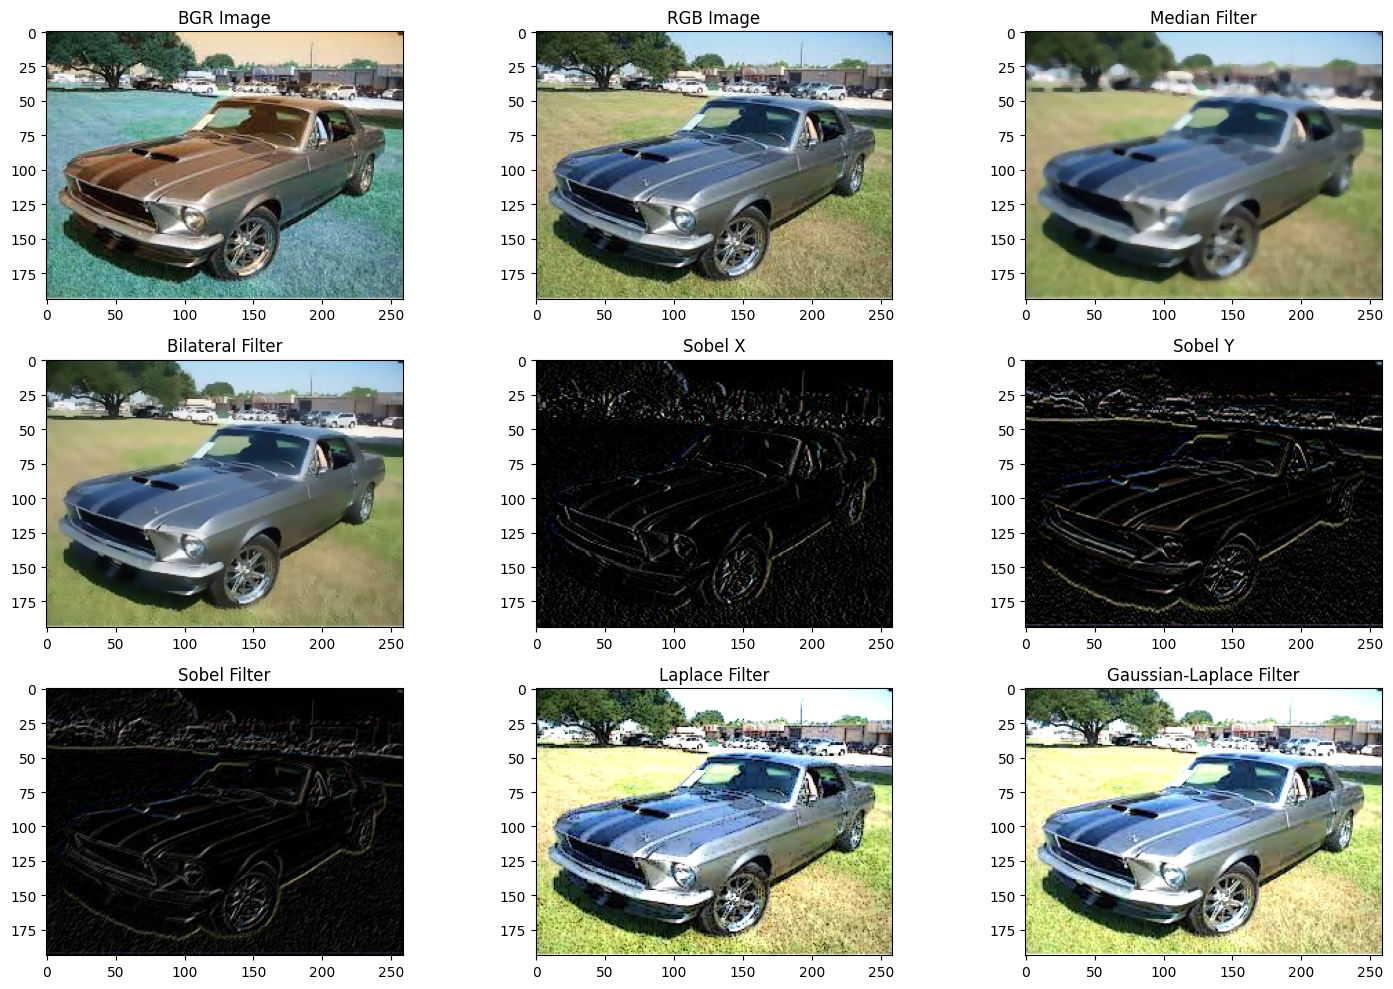

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("BGR Image")

plt.subplot(3, 3, 2)
plt.imshow(RGBimage)
plt.title("RGB Image")

plt.subplot(3, 3, 3)
plt.imshow(median)
plt.title("Median Filter")

plt.subplot(3, 3, 4)
plt.imshow(bilateral)
plt.title("Bilateral Filter")

plt.subplot(3, 3, 5)
plt.imshow(edgesx)
plt.title("Sobel X")

plt.subplot(3, 3, 6)
plt.imshow(edgesy)
plt.title("Sobel Y")

plt.subplot(3, 3, 7)
plt.imshow(edges)
plt.title("Sobel Filter")

plt.subplot(3, 3, 8)
plt.imshow(laplacianfilter)
plt.title("Laplace Filter")

plt.subplot(3, 3, 9)
plt.imshow(logfilter)
plt.title("Gaussian-Laplace Filter")

plt.tight_layout()
plt.show()